[View in Colaboratory](https://colab.research.google.com/github/msnaru/PRML/blob/master/scr/PRML2_2_1.ipynb)

# ディリクレ分布
多項分布$ \left(
    \begin{array}{c}
      N\\
     m_1m_2\ldots m_k
    \end{array}
  \right)  \mu_k^{m_k}$のパラメータ$\mu_k$に対する事前分布は共役分布として以下のように表現出来る。

\begin{equation*}
p(\boldsymbol{\mu} | \boldsymbol{\alpha}) \varpropto \prod_{k = 1}^K \mu_k^{\alpha_k-1}
\end{equation*}

ただし$\Sigma_k\mu_k=1$である。


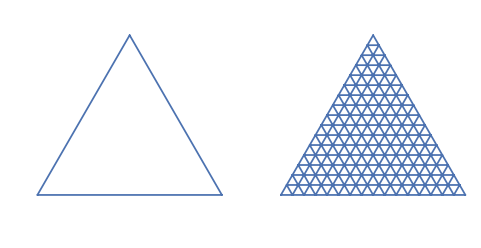

In [1]:
# https://y-mattu.hatenablog.com/entry/2016/03/03/143451　参考

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)
    
class Dir(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
      

def draw_pdf(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
